In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
data_txt = "drive/MyDrive/Numerical_Linear_Algebra/project2/example.dat"
data_csv = "drive/MyDrive/Numerical_Linear_Algebra/project2/RCsGoff.csv"

In [154]:
def pca_with_svd(data, matrix_choice=1):
    """
    Perform PCA using SVD.
    Parameters:
        data: string
            Input dataset (observations x features).
        matrix_choice: int
            1 for covariance matrix, 2 for correlation matrix.
    Returns:
        total_var: ndarray
            Portion of total variance accumulated in each PC.
        std_dev: ndarray
            Standard deviation of each PC.
        pca_coordinates: ndarray
            Expression of the original dataset in PCA coordinates.
        singular_values: ndarray
            Singular values for creating Scree plots.
    """

    if data.split('.')[-1] == 'csv':
        # Load the dataset
        data = pd.read_csv(data, index_col=0)
        sample_names = data.index.tolist()

        # Center the data
        X = data.values[:,1:]

    else:
        data = np.loadtxt(data)

    # Center the data
    X = data - np.mean(data, axis=0)
    n = X.shape[0]

    if matrix_choice == 2:  # Correlation matrix: standardize data
        X = (X / np.std(X, axis=0)).T

    # Perform SVD
    Y = 1 / np.sqrt(n - 1) * X.T
    U, S, VH = np.linalg.svd(Y, full_matrices=False)

    # Calculate outputs
    total_var = S**2 / np.sum(S**2)  # Proportion of total variance
    std_dev = S  # Standard deviation corresponds to singular values
    pca_coordinates = VH @ X#.T  # Expression in PCA coordinates

    return total_var, std_dev, pca_coordinates, S


In [155]:
def scree_plot(singular_values, matrix_type=1):
    """
    Create a Scree plot from singular values.
    Parameters:
        singular_values: ndarray
            Singular values from PCA.
        matrix_type: int
            1 for covariance matrix, 2 for correlation matrix.
    """
    eigenvalues = singular_values**2
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', label='Eigenvalues')
    plt.title(f'Scree Plot for the {"Covariance" if matrix_type == 1 else "Correlation"} Matrix')
    plt.xlabel('Principal Component Number')
    plt.ylabel('Eigenvalue')
    plt.grid(True)
    plt.legend()
    plt.show()

In [146]:
#Function that computes the 3/4 of the total variance rule
def rule_34(var):
    partial_var = 0
    i=0
    while partial_var < 3/4:
        partial_var += var[i]
        i+=1
    return i
#Function that computes the Kasier rule
def Kasier(S):
    count = 0
    for i in range(len(S)):
        if S[i]**2>1:
            count += 1
    return count

In [156]:
# Apply PCA with SVD (Covariance Matrix)
total_var_cov, std_dev_cov, pca_coords_cov, sample_names = pca_with_svd(data_txt, matrix_choice=1)

# Apply PCA with SVD (Correlation Matrix)
total_var_corr, std_dev_corr, pca_coords_corr, sample_names = pca_with_svd(data_txt, matrix_choice=2)

print('PCA using Covariance Matrix:')
print("Total Variance:", total_var_cov)
print("Standard Deviations:", std_dev_cov)
print("PCA Coordinates:\n", pca_coords_cov)
print('3/4', rule_34(total_var_cov) )
print('kaiser', Kasier(sample_names))

print("\nPCA using Correlation Matrix:")
print("Total Variance:", total_var_corr)
print("Standard Deviations:", std_dev_corr)
print("PCA Coordinates:\n", pca_coords_corr)
print('3/4', rule_34(total_var_corr) )
print('kaiser', Kasier(sample_names))


PCA using Covariance Matrix:
Total Variance: [0.66979347 0.15887735 0.13452316 0.03680602]
Standard Deviations: [3.05353618 1.48718027 1.36845699 0.71580055]
PCA Coordinates:
 [[-7.04570495 -1.2837116   7.15846531  6.10964391]
 [ 2.18077568  4.8052075   1.54081679  1.71920315]
 [ 3.74428378 -2.86289547  1.68508057  1.74206484]
 [-0.14176797 -0.05826626 -1.88222249  2.02960634]]
3/4 2
kaiser 2

PCA using Correlation Matrix:
Total Variance: [0.60757275 0.24030055 0.11616759 0.03595911]
Standard Deviations: [1.61006534 1.01256227 0.70402299 0.39169574]
PCA Coordinates:
 [[-1.14520929 -2.13579331 -0.3753926  -2.09369303 -0.69056863 -1.66810444
  -2.46227084 -0.83716461  1.55237366  1.93639418  1.68175129  0.76950876
   1.28231691  0.87575117  0.94992252  2.36017827]
 [-0.20585347 -1.82692136 -0.72038791  0.91650704  1.39486696 -1.0528595
   0.7911549  -0.13681365  0.28114087 -1.21356043  0.95800676  1.62233387
  -0.5697695   0.08674892  0.69067064 -1.01526413]
 [ 0.35127392  0.28494506  0.

In [162]:
results_df = pd.DataFrame(data=pca_coords_corr, columns=[f"PC{i+1}" for i in range(pca_coords_corr.shape[1])])
#results_df["Variance"] = total_var_cov
#results_df.insert(0, "Sample", sample_names)  # Insert as the first column

In [163]:
results_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,-1.145209,-2.135793,-0.375393,-2.093693,-0.690569,-1.668104,-2.462271,-0.837165,1.552374,1.936394,1.681751,0.769509,1.282317,0.875751,0.949923,2.360178
1,-0.205853,-1.826921,-0.720388,0.916507,1.394867,-1.052859,0.791155,-0.136814,0.281141,-1.213560,0.958007,1.622334,-0.569770,0.086749,0.690671,-1.015264
2,0.351274,0.284945,0.832809,-0.776373,1.144748,0.036825,-1.115232,0.503649,0.314668,-0.677493,-0.179069,0.874727,-0.409975,-0.176566,-1.232872,0.223935
3,0.228213,-0.195057,0.250158,0.615400,-0.198649,0.226104,-0.546246,-0.150985,0.383858,-0.678242,0.413794,-0.486110,0.421604,-0.398591,0.050397,0.064352


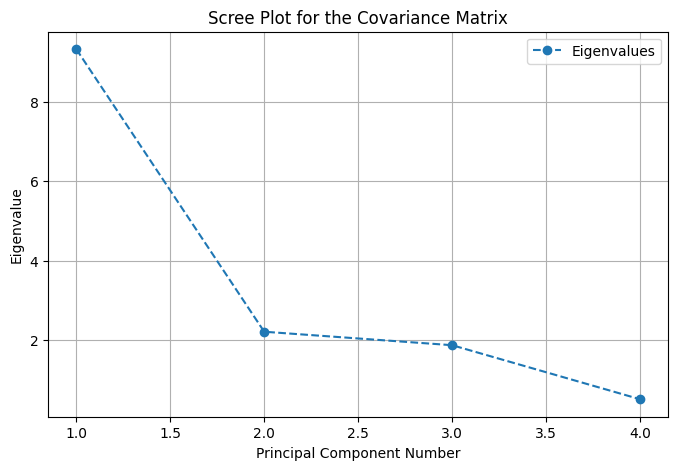

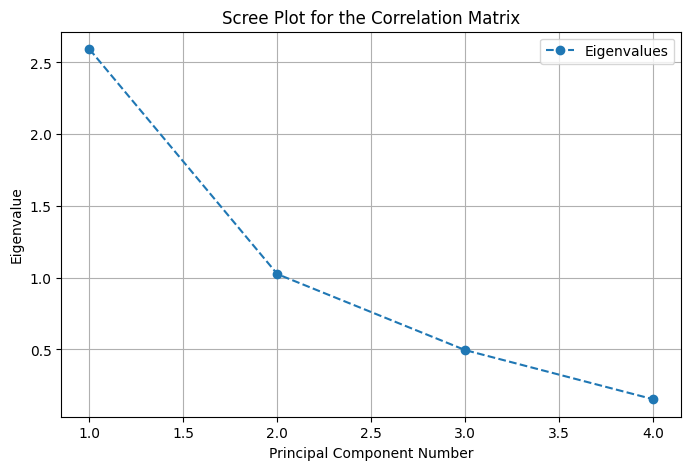

In [ ]:
# Create Scree Plots
scree_plot(std_dev_cov, matrix_type=1)
scree_plot(std_dev_corr, matrix_type=2)

In [118]:
#Function that computes the 3/4 of the total variance rule
def rule_34(var):
    partial_var = 0
    i=0
    while partial_var < 3/4:
        partial_var += var[i]
        i+=1
    return i
#Function that computes the Kasier rule
def Kasier(S):
    count = 0
    for i in range(len(S)):
        if S[i]**2>1:
            count += 1
    return count

In [164]:
def pca_with_svd_gene(data_path, matrix_choice=1):
    """
    Perform PCA using SVD.
    Parameters:
        data: string
            Input dataset (observations x features).
        matrix_choice: int
            1 for covariance matrix, 2 for correlation matrix.
    Returns:
        total_var: ndarray
            Portion of total variance accumulated in each PC.
        std_dev: ndarray
            Standard deviation of each PC.
        pca_coordinates: ndarray
            Expression of the original dataset in PCA coordinates.
        singular_values: ndarray
            Singular values for creating Scree plots.
    """

    # Load the dataset
    data = pd.read_csv(data_path)
    sample_names = data.columns[1:]

    # Center the data
    X = data.values[:,1:]

    #Substract the mean
    for i in range(np.shape(X)[0]):
        X[i,] = X[i,]-np.mean(X[i,])

    # Center the data
    #X = X - np.mean(X, axis=0)
    m = X.shape[0]
    n = X.shape[1]
    print('m, n', m, n)

    if matrix_choice == 2:  # Correlation matrix: standardize data
        X = (X / np.std(X, axis=0))#.T

    # Perform SVD
    Y = 1 / np.sqrt(n-1) * X.T.astype(float)
    U, S, VH = np.linalg.svd(Y, full_matrices=False)

    # Calculate outputs
    total_var = S**2 / np.sum(S**2)  # Proportion of total variance
    std_dev = S  # Standard deviation corresponds to singular values
    pca_coordinates = VH@X#.T  # Expression in PCA coordinates

    return total_var, std_dev, pca_coordinates, sample_names

In [165]:
total_var_cov, std_dev_cov, pca_coords_cov, sample_names = pca_with_svd_gene(data_csv, matrix_choice=1)

m, n 58581 20


In [166]:
print('3/4', rule_34(total_var_cov))
print('kaiser', Kasier(std_dev_cov))

3/4 2
kaiser 19


In [167]:
results_df = pd.DataFrame(data=pca_coords_cov.T, columns=[f"PC{i+1}" for i in range(pca_coords_cov.shape[0])])
results_df["Variance"] = total_var_cov
results_df.insert(0, "Sample", sample_names)  # Insert as the first column

In [168]:
results_df

,Sample,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Variance
0,day0_rep1,-737166.470505,-18654.586943,-164214.491213,-33261.510936,54946.952587,7870.620231,786.744623,31877.107402,-4936.602235,...,-3917.408877,3005.571229,-1613.753372,-616.083917,-4493.558353,-7045.606907,8315.616043,-793.109592,0.0,7.229911e-01
1,day0_rep2,-610808.203023,16615.789612,-199713.263901,-89598.672155,120567.552631,494.306035,-19679.296363,-69062.596558,2339.920761,...,5034.084079,-2607.727616,2056.105292,785.385926,1358.404064,-157.584562,-61.262506,600.789352,0.0,1.578447e-01
2,day0_rep3,-488599.645775,52940.054655,-316005.864682,-53233.762939,70854.099458,-8570.249993,-20065.245125,50778.08298,6063.366044,...,-1176.337736,-185.364116,-452.417603,57.844759,2061.625392,5475.125829,-5994.393031,132.150611,0.0,6.688877e-02
3,day1_rep1,43482.63969,-227207.612775,47294.736355,-114576.89721,-47120.453275,-68853.582214,8901.137978,-17000.890323,-7803.916256,...,8605.218394,755.983947,7539.72494,275.256588,-1618.100749,-963.44408,1161.149129,2856.569383,0.0,2.887355e-02
4,day1_rep2,-3686.273616,-224777.225182,49945.794488,-97746.569924,-55659.565494,-75027.18566,13069.65199,17972.242818,5355.134746,...,1943.336459,-9034.056424,-6601.490731,-9193.492193,-74.619037,-2994.997938,-1651.922275,-660.431008,0.0,1.226257e-02
5,day1_rep3,-73671.40288,-224216.606867,74303.809368,-106981.158073,-40119.921618,-64246.730974,15065.024633,-8657.633258,5639.185962,...,-11910.56822,8262.08866,-1708.61668,8651.891465,2490.989659,4190.035724,428.178181,-2479.846901,0.0,4.613076e-03
6,day2_rep1,-641167.49024,15269.551427,139178.340565,68522.818959,-18384.681611,38217.747701,33612.259877,-18041.226682,10993.995572,...,-1197.904779,-2218.322724,255.419625,-3786.52282,5121.267455,-679.230654,426.211787,-8502.441702,0.0,3.627251e-03
7,day2_rep2,-639134.52305,6240.986687,143593.594437,65834.08923,-28454.00278,22349.371355,21656.905341,-5024.330415,7039.336736,...,-542.689029,3754.531883,254.863035,3063.014964,-12674.670014,-1224.525054,-5505.323503,544.300779,0.0,1.575493e-03
8,day2_rep3,-624943.583481,18917.775358,140259.210599,84468.528955,-31131.880903,27285.801221,32754.229078,9837.845272,20413.343525,...,2536.02012,1.43196,-401.078043,-347.894243,5253.119477,3113.305157,3405.743482,8470.379466,0.0,4.119133e-04
9,day4_rep1,315658.099345,252023.173366,233259.388171,-21081.867913,43741.762089,-9069.463068,-59447.435834,18166.691398,6803.917336,...,999.499699,-3187.74376,-141.838912,8053.614632,4444.615831,-8695.660792,-1580.188371,356.588654,-0.0,3.137352e-04


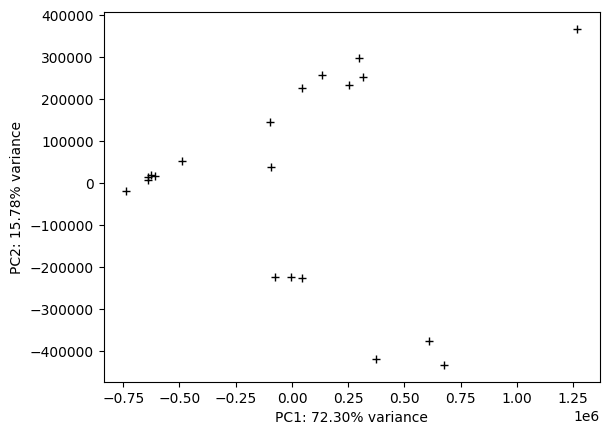

In [169]:
plt.plot(pca_coords_cov[0,],pca_coords_cov[1,],'+k')
plt.xlabel('PC1: 72.30% variance')
plt.ylabel('PC2: 15.78% variance')
plt.savefig('Last PCA plot.pdf', dpi=300, bbox_inches='tight')
plt.show()

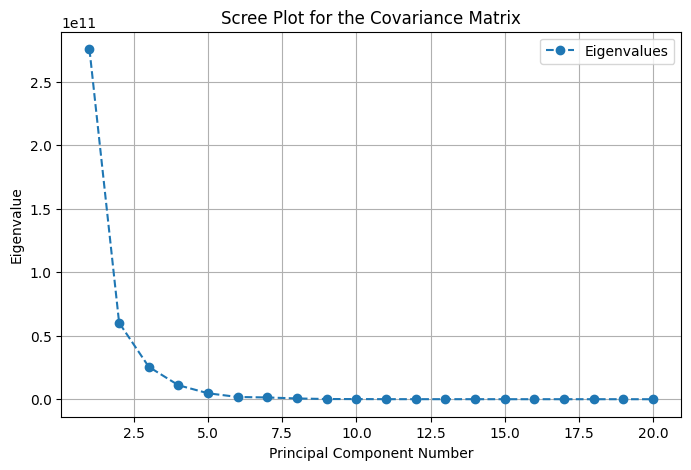

In [137]:
scree_plot(std_dev_cov, matrix_type=1)